In [11]:
# starting web3 operations
import numpy as np
import json
from web3 import Web3
# ganache_url = "https://ropsten.infura.io/v3/6072fdc3b95c407caa681f63ebaf72b8"
ganache_url ="http://127.0.0.1:8545"
web3 = Web3(Web3.HTTPProvider(ganache_url))
web3.isConnected()

True

In [12]:
# Basic web3 
# block = web3.eth.get_block('latest')
# balance_1 = web3.eth.getBalance("0x37bfB436392DaAE0E91EdcD9c4128FBcADF3919d")
# print(web3.fromWei(balance_1,'ether'))

In [13]:
abi = json.loads('[ { "constant": false, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" }, { "name": "a", "type": "uint256" }, { "name": "b", "type": "uint256" } ], "name": "sigmoid_act", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" } ], "name": "div", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "sigprint", "outputs": [ { "name": "", "type": "uint256" }, { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')
cont_address = "0x60B5F6Fdcdd217f02c3bc86675C05BeBC2fAC150"

In [14]:
contract = web3.eth.contract(address=cont_address,abi=abi)

In [15]:
account1 = "0xdd617f9D5120b7b30E4C502fdd6b13dCf286A300"
private_key1="c00b36dc1777e7fda60ff1f55b57c3f51b18c0c16fe44724e451ed062a173d74"
account2 = "0x8883f1016E727C8fE93C1Df471f102bBbAF2B910"
private_key2="8d70f54549b5fb7c04fc016cc88c447fc81aff3af3065c696aee1b529fbc8ba5"


In [16]:
nonce = web3.eth.getTransactionCount(account1)

In [17]:
def sigfrac(x,y,a,b):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = contract.functions.sigmoid_act(
        x,y,a,b
         ).buildTransaction({
        'gas': 100000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

In [18]:
n, d = contract.functions.sigprint().call()
print("value of sigmoid is:", n/d)

ZeroDivisionError: division by zero

In [29]:
# default sigmoid from system
import math
import numpy as np
def sigmoid(x,y):
    sig = 1 / (1 + math.exp(-x/y))
    return sig

In [30]:
a_list = list(range(-200, 201))
a_val_num = np.array(a_list)
a_val_den = np.full(401,10)

In [31]:
sig_b=np.zeros(401)
for i in range(len(a_val_num)):
    sig_b[i] = sigmoid(int(a_val_num[i]),int(a_val_den[i]))
    

In [32]:
sig_e=np.zeros(401)
gasUse =[]
for i in range(len(a_val_num)):
    if (a_val_num[i]<0):
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]*(-1)),int(a_val_den[i])))
    else:
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]),int(a_val_den[i]))) 
    n, d = contract.functions.sigprint().call()
    
    sig_e[i] = n/d

In [33]:
# sig_b

In [34]:
# sig_e

In [35]:
d = np.arange(-2.0, 2.01, 0.01)
# d

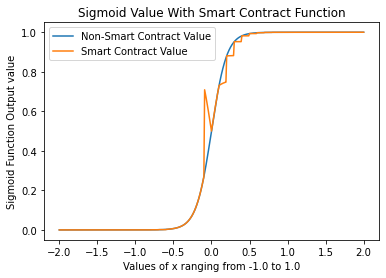

In [38]:
import matplotlib.pyplot as plt
plt.plot(d, sig_b, label = "Non-Smart Contract Value")
plt.plot(d, sig_e, label = "Smart Contract Value")
plt.xlabel("Values of x ranging from -1.0 to 1.0")
plt.ylabel("Sigmoid Function Output value")
plt.title("Sigmoid Value With Smart Contract Function")
plt.legend()
# plt.savefig("sigmoid_output.pdf")
plt.show()

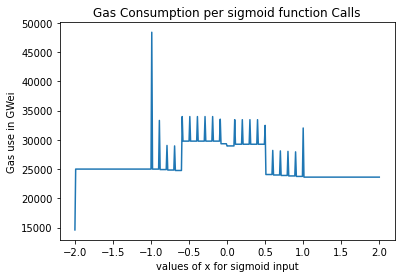

In [37]:
plt.plot(d, gasUse, label="gas Used Per Function Call")
plt.title("Gas Consumption per sigmoid function Calls")
plt.ylabel("Gas use in GWei")
plt.xlabel("values of x for sigmoid input")
# plt.savefig("sigmoid_gas.pdf")
plt.show()